In [531]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import textwrap

file_path = r'Путь\Nutrition__Physical_Activity__and_Obesity.csv'

df = pd.read_csv(file_path)

#df.drop('GeoLocation', axis=1)
pd.set_option('display.max_columns', None)

<h3>Преобразование датасета</h3>
<p>Убеждаемся, что у всех колонок есть название:

In [532]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

Размер датасета:

In [533]:
df.shape

(104272, 33)

Проверяем столбцы на количество Null значения:

In [534]:
na_values = pd.DataFrame(df.isna().sum(), columns=["Total NaN values"])
na_values["% NaN values"] = na_values["Total NaN values"].apply(lambda x: x/df.shape[0]*100)

Среди столбцов выводим те, у который процент значений Null более 50%:

In [535]:
drop_na_columns = na_values.loc[na_values["% NaN values"] > 50]
drop_na_columns

,Total NaN values,% NaN values
Data_Value_Footnote_Symbol,93505,89.674122
Data_Value_Footnote,93505,89.674122
Total,100548,96.428571
Age(years),81928,78.571429
Education,89376,85.714286
Gender,96824,92.857143
Income,78204,75.000000
Race/Ethnicity,74480,71.428571


Инициализируем переменную df1, как копию датафрейма df без столбцов, содержащие более 50% значений Null, тк эти данные не являются репрезентативными

In [536]:
df1 = df.drop(drop_na_columns.index.values, axis=1)
df1.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,23.3,23.3,16.1,32.4,128.0,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,35.5,35.5,22.7,50.9,63.0,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,21.7,21.7,19.1,24.6,1702.0,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Gender,Female,GEN,FEMALE


Смотрим есть ли дублирующиеся значения:

In [537]:
df1.duplicated().sum()

np.int64(0)

In [538]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  104272 non-null  int64  
 1   YearEnd                    104272 non-null  int64  
 2   LocationAbbr               104272 non-null  object 
 3   LocationDesc               104272 non-null  object 
 4   Datasource                 104272 non-null  object 
 5   Class                      104272 non-null  object 
 6   Topic                      104272 non-null  object 
 7   Question                   104272 non-null  object 
 8   Data_Value_Unit            88872 non-null   float64
 9   Data_Value_Type            104272 non-null  object 
 10  Data_Value                 93505 non-null   float64
 11  Data_Value_Alt             93505 non-null   float64
 12  Low_Confidence_Limit       93505 non-null   float64
 13  High_Confidence_Limit      93

Столбцы "YearStart" и "YearEnd" идентичны, поэтому оставляем только один, переменовываем его в "Year"

In [539]:
(df1.YearStart != df1.YearEnd).sum()

np.int64(0)

In [540]:
df1.drop('YearEnd', axis=1, inplace=True)
df1.rename(columns={'YearStart': 'Year'}, inplace=True)

In [541]:
print(df1.Datasource.unique())
print(df1.DataValueTypeID.unique())
print()
print(df1.Class.unique())
print(df1.Topic.unique())
print()
print(df1.QuestionID.unique())
print(df1.Question.unique())

['BRFSS']
['VALUE']

['Obesity / Weight Status' 'Physical Activity' 'Fruits and Vegetables']
['Obesity / Weight Status' 'Physical Activity - Behavior'
 'Fruits and Vegetables - Behavior']

['Q036' 'Q044' 'Q037' 'Q046' 'Q045' 'Q047' 'Q043' 'Q018' 'Q019']
['Percent of adults aged 18 years and older who have obesity'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults aged 18 years and older who have an overweight classification'
 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who engage in no leisure-time physical 

<h4>Вывод из анализа столбцов:</h4>
<p>1. Столбец Datasource имеет только одно уникальное значение, которое является источником информации. Для анализа не нужен. (Будет удален); </p>
<p>2. Столбцы Class и Topic идентичны, поэтому оставляем только один из них - Topic;</p>


<h2>Список вопросов:</h2>

In [581]:
questions = df1[['Question', 'QuestionID']].drop_duplicates()
questions

,Question,QuestionID
0,Percent of adults aged 18 years and older who ...,Q036
2,Percent of adults who achieve at least 150 min...,Q044
4,Percent of adults aged 18 years and older who ...,Q037
6,Percent of adults who engage in muscle-strengt...,Q046
9,Percent of adults who achieve at least 300 min...,Q045
16,Percent of adults who engage in no leisure-tim...,Q047
17,Percent of adults who achieve at least 150 min...,Q043
44555,Percent of adults who report consuming fruit l...,Q018
44557,Percent of adults who report consuming vegetab...,Q019


In [543]:
df1['count'] = round(df1['Sample_Size']*df1['Data_Value']//100)

In [544]:
df1 = df1.drop(df1[df1['LocationDesc'].isin(['District of Columbia', 'Puerto Rico', 'Guam', 'Virgin Islands'])].index)

In [545]:
df1 = df1[['Year', 'LocationDesc', 'Topic', 'QuestionID', 'Question', 'Data_Value', 
'Sample_Size', 'StratificationCategory1', 'Stratification1', 'count']]

In [546]:
def state_in(state):
    return states_list.index(state)

states_list = ['National', 'Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
               'Colorado', 'Connecticut', 'Delaware', 'Florida',
               'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois',
               'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
               'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
               'Mississippi', 'Montana', 'North Carolina', 'North Dakota',
               'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada',
               'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
               'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
               'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington',
               'Wisconsin', 'West Virginia', 'Wyoming']
df1['Loc_Num'] = df1['LocationDesc'].apply(state_in)

In [547]:
df1.head()

,Year,LocationDesc,Topic,QuestionID,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1,count,Loc_Num
0,2011,Alaska,Obesity / Weight Status,Q036,Percent of adults aged 18 years and older who ...,23.3,128.0,Race/Ethnicity,2 or more races,29.0,1
1,2011,Alaska,Obesity / Weight Status,Q036,Percent of adults aged 18 years and older who ...,35.5,63.0,Race/Ethnicity,Other,22.0,1
2,2011,Alaska,Physical Activity - Behavior,Q044,Percent of adults who achieve at least 150 min...,21.7,1702.0,Gender,Female,369.0,1
3,2011,Alaska,Obesity / Weight Status,Q036,Percent of adults aged 18 years and older who ...,29.5,562.0,Age (years),35 - 44,165.0,1
4,2011,Alaska,Obesity / Weight Status,Q037,Percent of adults aged 18 years and older who ...,33.5,377.0,Income,"$15,000 - $24,999",126.0,1


In [548]:
list(df1[(df1['LocationDesc']=='National') & (df1['QuestionID']=='Q036')]['StratificationCategory1'].unique())

['Income', 'Age (years)', 'Total', 'Race/Ethnicity', 'Education', 'Gender']

<h2>1. Наличие ожирения</h2>

<hr>
<h4>1.1. Построим корреляцию между возрастом и наличием ожирения</h4>

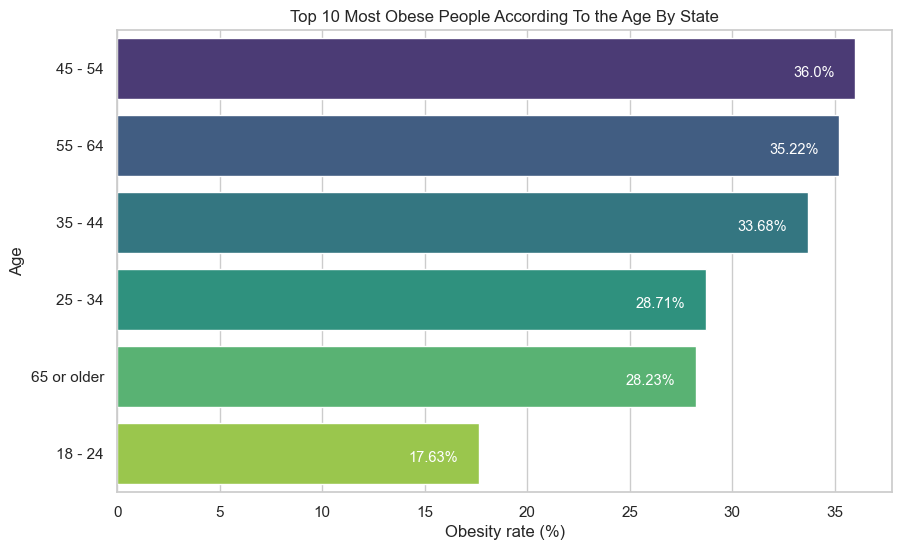

In [577]:
ag = df1[(df1['QuestionID']=='Q036') & (df1['LocationDesc']=='National') & (df1['StratificationCategory1']=='Age (years)')].sort_values(by=['Stratification1', 'count', 'Sample_Size', 'Data_Value'], ascending=[False, False, False, False]).reset_index(drop=True)
age = ag.groupby('Stratification1')['Data_Value'].mean().reset_index().sort_values(by='Data_Value', ascending=False)

fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Data_Value', y='Stratification1', hue='Stratification1', data=age, palette='viridis')
for i in age['Data_Value']:
    plt.text(i-1, list(age['Data_Value']).index(i)+0.1, f'{round(i, 2)}%', fontsize=10.5, ha='right', color='white')
    
plt.title('Top 10 Most Obese People According To the Age By State')
plt.xlabel('Obesity rate (%)')
plt.ylabel('Age')

plt.show()

<h4>Вывод:</h4>
<p>Наибольший уровень ожирения наблюдается среди людей в возрасте 45-54 лет (36.0%) и 55-64 лет (35.22%).
<p>Наименьший уровень ожирения отмечен среди молодых людей в возрасте 18-24 лет (17.63%).
<p>Промежуточные уровни ожирения наблюдаются среди людей в возрасте 35-44 лет (33.68%), 25-34 лет (28.71%), и 65 лет и старше (28.23%).
<h4>Возможные причины:</h4>
1. Метаболические изменения с возрастом<p>
2. Уровень физической активности<p>
3. Пищевые привычки<p>
4. Социально-экономические факторы

<hr>
<h4>1.2 Найдем корреляцию между уровнем дохода и наличием ожирения</h4>

In [551]:
inc = df1[(df1['QuestionID']=='Q036') & (df1['LocationDesc']=='National')].sort_values(by=['Stratification1', 'count', 'Sample_Size', 'Data_Value'], ascending=[False, False, False, False]).reset_index(drop=True)
income = inc[inc['StratificationCategory1']=='Income'].groupby('Stratification1')['Data_Value'].mean().reset_index().sort_values(by='Data_Value', ascending=False)

In [552]:
print('Выборка:')
print(inc[inc['StratificationCategory1']=='Income'].groupby('Stratification1')['Sample_Size'].mean().reset_index().sort_values(by='Sample_Size', ascending=False))
print('Процент ожирения:')
print(income)

Выборка:
      Stratification1   Sample_Size
4  $75,000 or greater  97584.076923
5   Data not reported  81060.153846
3   $50,000 - $74,999  57009.769231
0   $15,000 - $24,999  52765.230769
2   $35,000 - $49,999  49830.615385
1   $25,000 - $34,999  38887.923077
6   Less than $15,000  32343.153846
Процент ожирения:
      Stratification1  Data_Value
6   Less than $15,000   35.715385
0   $15,000 - $24,999   34.530769
1   $25,000 - $34,999   32.961538
2   $35,000 - $49,999   32.300000
3   $50,000 - $74,999   31.792308
4  $75,000 or greater   27.507692
5   Data not reported   26.107692


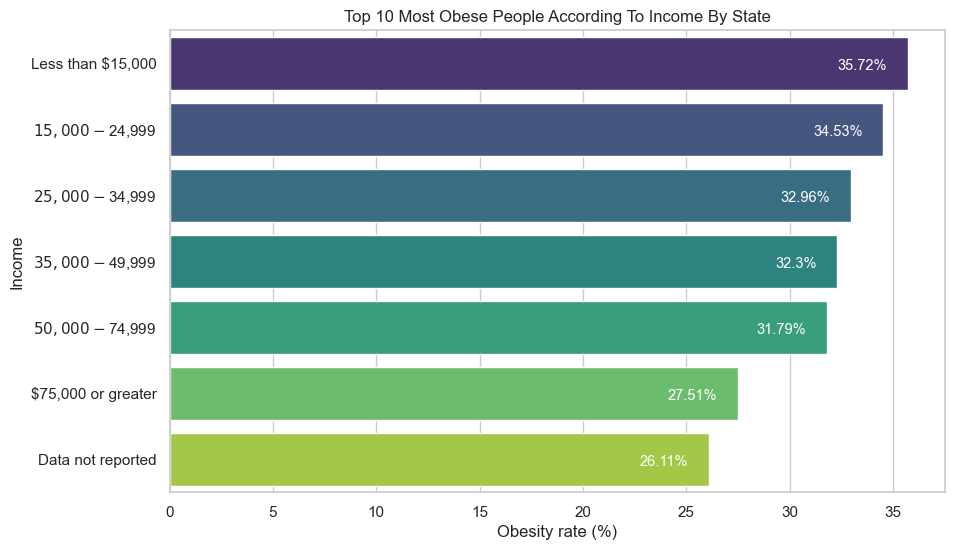

In [553]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Data_Value', y='Stratification1', hue='Stratification1', data=income, palette='viridis')
for i in income['Data_Value']:
    plt.text(i-1, list(income['Data_Value']).index(i)+0.1, f'{round(i, 2)}%', fontsize=10.5, ha='right', color='white')
    
plt.title('Top 10 Most Obese People According To Income By State')
plt.xlabel('Obesity rate (%)')
plt.ylabel('Income')

plt.show()

<h4>Вывод:</h4>
<p>Наибольший уровень ожирения наблюдается среди людей с доходом менее $15,000 (35.72%) и в диапазоне $15,000 - $24,999 (34.53%).
<p>Наименьший уровень ожирения отмечен среди людей с доходом $75,000 и выше (27.51%) и тех, чьи данные о доходе не указаны (26.11%).
<p>Промежуточные уровни ожирения наблюдаются среди людей с доходом в диапазоне $25,000 - $34,999 (32.96%), $35,000 - $49,999 (32.3%), и $50,000 - $74,999 (31.79%)
<h4>Возможные причины:</h4>
<p>1. Доступ к здоровой пище: Люди с более низким доходом могут иметь ограниченный доступ к свежим и здоровым продуктам питания, что приводит к более высокому потреблению калорийной и менее питательной пищи.
<p>2. Физическая активность: Люди с более высоким доходом могут иметь больше возможностей для занятий спортом и физической активности, включая членство в фитнес-клубах и доступ к безопасным местам для прогулок и тренировок.
<p>3. Медицинское обслуживание: Люди с более высоким доходом могут иметь лучший доступ к медицинским услугам и консультациям по вопросам здоровья и питания.
<p>4. Образование и осведомленность: Уровень образования и осведомленность о здоровом образе жизни могут быть выше среди людей с более высоким доходом.

<hr>
<h4>1.3 Найдем корреляции между расовой, этнической принадлежностью и наличием ожирения:</h4>

In [554]:
ra = df1[(df1['QuestionID']=='Q036') & (df1['LocationDesc']=='National')].sort_values(by=['Stratification1', 'count', 'Sample_Size', 'Data_Value'], ascending=[False, False, False, False]).reset_index(drop=True)
race = ra[ra['StratificationCategory1']=='Race/Ethnicity'].groupby('Stratification1')['Data_Value'].mean().reset_index().sort_values(by='Data_Value', ascending=False)
stratification1 = ra[ra['StratificationCategory1']=='Race/Ethnicity']['Stratification1'].unique()

In [555]:
print('Выборка:')
print(ra[ra['StratificationCategory1']=='Race/Ethnicity'].groupby('Stratification1')['Sample_Size'].mean().reset_index().sort_values(by='Sample_Size', ascending=False))
print('Процент страдающих ожирением от выборки:')
print(race)
print('Список всех расовых и этнических принадлежностей:')
print(stratification1)

Выборка:
                 Stratification1    Sample_Size
6             Non-Hispanic White  315804.000000
5             Non-Hispanic Black   32080.076923
4                       Hispanic   27954.230769
2                          Asian    8724.538462
0                2 or more races    8203.538462
1  American Indian/Alaska Native    6585.692308
7                          Other    2509.166667
3      Hawaiian/Pacific Islander    1043.153846
Процент страдающих ожирением от выборки:
                 Stratification1  Data_Value
5             Non-Hispanic Black   39.753846
1  American Indian/Alaska Native   37.161538
4                       Hispanic   33.553846
3      Hawaiian/Pacific Islander   33.246154
0                2 or more races   31.676923
6             Non-Hispanic White   29.315385
7                          Other   26.658333
2                          Asian   10.907692
Список всех расовых и этнических принадлежностей:
['Other' 'Non-Hispanic White' 'Non-Hispanic Black' 'Hispanic'
 

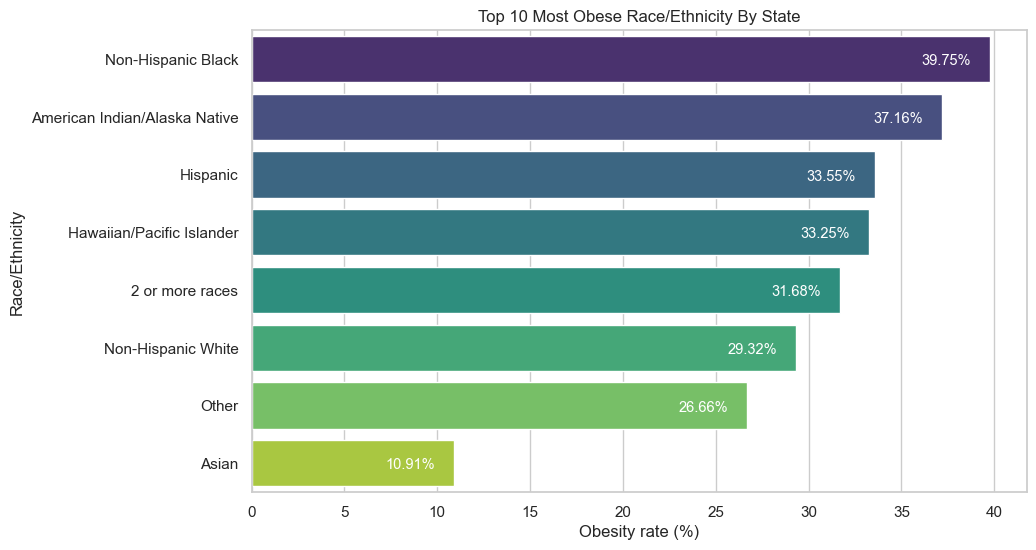

In [556]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Data_Value', y='Stratification1', hue='Stratification1', data=race, palette='viridis')
for i in race['Data_Value']:
    plt.text(i-1, list(race['Data_Value']).index(i)+0.1, f'{round(i, 2)}%', fontsize=10.5, ha='right', color='white')
plt.title('Top 10 Most Obese Race/Ethnicity By State')
plt.xlabel('Obesity rate (%)')
plt.ylabel('Race/Ethnicity')

plt.show()

<h4>Вывод:</h4>
<p>Наибольший уровень ожирения наблюдается среди неиспаноязычных чернокожих (39.75%) и коренных американцев/аляскинских коренных жителей (37.16%).
<p>Наименьший уровень ожирения отмечен среди азиатов (10.91%).
<p>Промежуточные уровни ожирения наблюдаются среди испаноязычных (33.55%), гавайцев/жителей тихоокеанских островов (33.25%), представителей двух и более рас (31.68%), неиспаноязычных белых (29.32%) и других групп (26.66%).
<h4>Возможные причины:</h4>
1. Социально-экономические факторы<p>
2. Культурные и пищевые привычки<p>
3. Генетические факторы<p>
4. Физическая активность<p>
5. Психологические и социальные факторы
<hr>

<h4>1.4 Возьмем среднее выявленное кол-во людей с ожирением опираясь на уровень образования:</h>

In [557]:
ed = df1[(df1['QuestionID']=='Q036') & (df1['LocationDesc']=='National')].sort_values(by=['Stratification1', 'count', 'Sample_Size', 'Data_Value'], ascending=[False, False, False, False]).reset_index(drop=True)
edu = ed[ed['StratificationCategory1']=='Education'].groupby('Stratification1')['Data_Value'].mean().reset_index()

Опираясь на то, что выборка людей, образование которых ниже средней школы, гораздо меньше нежели у других, получивших/ющих образование выше, будет некорректно сравнивать уровень образования с наличием ожирения по количеству людей. Будем сравнивать процент людей с ожирением от выборки по уровню образования.

In [558]:
ed[ed['StratificationCategory1']=='Education'].groupby('Stratification1')['Sample_Size'].mean().reset_index()

,Stratification1,Sample_Size
0,College graduate,155356.923077
1,High school graduate,111992.153846
2,Less than high school,28805.384615
3,Some college or technical school,112432.692308


In [559]:
edu

,Stratification1,Data_Value
0,College graduate,23.569231
1,High school graduate,32.761538
2,Less than high school,35.446154
3,Some college or technical school,32.100000


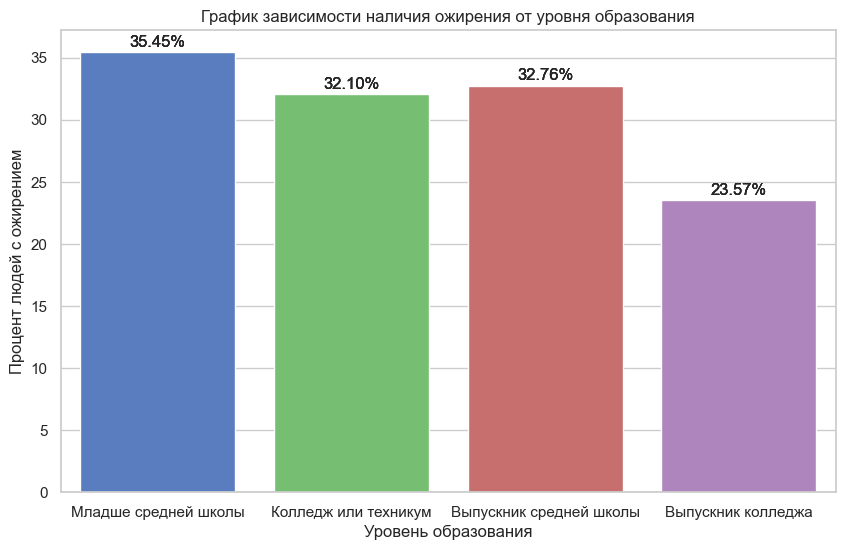

In [560]:
def add_labels(ax):
       for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 7),
                    textcoords='offset points')

yy = 'Data_Value'
with plt.style.context('seaborn-v0_8-muted'):
       fig = plt.figure(figsize=(10, 6))

       ax1 = sns.barplot(x='Stratification1', y=yy, data=edu[edu['Stratification1']=='Less than high school'])
       ax2 = sns.barplot(x='Stratification1', y=yy, data=edu[edu['Stratification1']=='Some college or technical school'])
       ax3 = sns.barplot(x='Stratification1', y=yy, data=edu[edu['Stratification1']=='High school graduate'])
       ax4 = sns.barplot(x='Stratification1', y=yy, data=edu[edu['Stratification1']=='College graduate'])

       add_labels(ax1)
       add_labels(ax2)
       add_labels(ax3)
       add_labels(ax4)
       
       plt.xlabel('Уровень образования')
       plt.ylabel('Процент людей с ожирением')
       plt.title('График зависимости наличия ожирения от уровня образования')

       ax1.set_xticks(['Less than high school', 'Some college or technical school', 'High school graduate', 'College graduate'])
       ax1.set_xticklabels(['Младше средней школы', 'Колледж или техникум', 'Выпускник средней школы', 'Выпускник колледжа'])

       plt.show()

<h5>Различия по уровням образования:</h5>

Младше средней школы: Процент людей с ожирением составляет 35.45%, что является самым высоким показателем среди всех уровней образования.
Колледж или техникум: Процент людей с ожирением составляет 32.10%, что ниже, чем у тех, кто имеет образование младше средней школы.
Выпускник средней школы: Процент людей с ожирением составляет 32.76%, что немного выше, чем у тех, кто посещал колледж или техникум.
Выпускник колледжа: Процент людей с ожирением составляет 23.57%, что является самым низким показателем среди всех уровней образования.

<h5>Анализ различий:</h5>

Разница между самым низким уровнем образования (младше средней школы) и самым высоким уровнем образования (выпускник колледжа) составляет 11.88%. Это значительное различие, указывающее на то, что уровень образования может быть связан с наличием ожирения.
Процент людей с ожирением среди тех, кто окончил колледж или техникум, а также среди выпускников средней школы, относительно близок, что указывает на менее выраженные различия между этими группами.

<h5>Возможные причины:</h5>

Высокий уровень образования может быть связан с более высоким уровнем дохода и, соответственно, с более высоким уровнем потребления калорийной пищи и меньшей физической активностью.
Люди с более низким уровнем образования могут иметь меньше доступа к качественному питанию и медицинским услугам, что также может влиять на уровень ожирения.
Образование может способствовать более здоровому образу жизни, включая правильное питание и регулярные физические упражнения.

<h5>Заключение:</h5>

График показывает, что уровень образования имеет значительное влияние на наличие ожирения среди населения.
<hr>

<h4>1.5 Были сделаны выборки из 200 до 270 тысяч человек среди населения США за каждый год</h4>

In [561]:
meow = df1[(df1['StratificationCategory1']=='Gender')].sort_values(by=['Year', 'QuestionID', 'Question', 'Data_Value', 'Sample_Size', 'count'], ascending=[True, True, True, False, False, False]).reset_index(drop=True)
mur = meow[(meow['LocationDesc']=='National') & (meow['QuestionID']=='Q036')].groupby('Year').head(11)

m_mur = mur[mur['Stratification1']=='Male']
f_mur = mur[mur['Stratification1']=='Female']

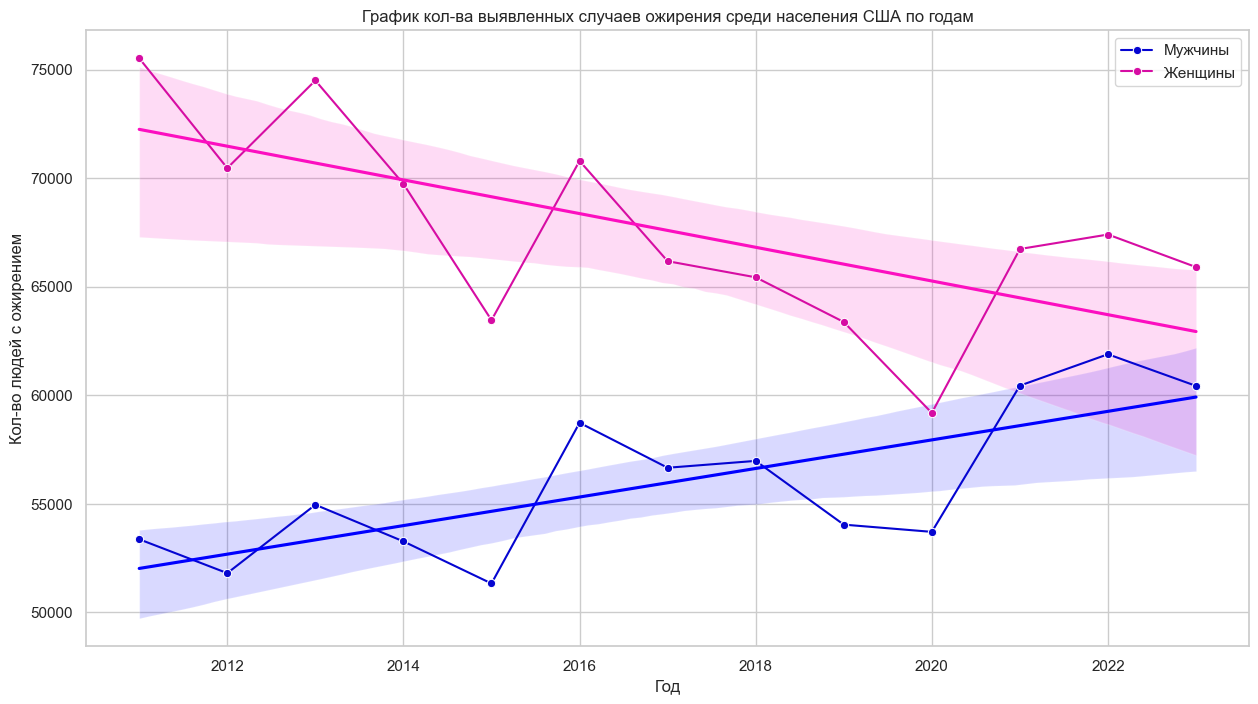

In [562]:
fig = plt.figure(figsize=(15, 8))
ax1 = sns.lineplot(x='Year', y='count', data=m_mur, marker='o', label='Мужчины', color='#0505D1')
ax2 = sns.lineplot(x='Year', y='count', data=f_mur, marker='o', label='Женщины', color='#D60DA3')

sns.regplot(x='Year', y='count', data=m_mur, scatter=False, color='blue', ax=ax1)
sns.regplot(x='Year', y='count', data=f_mur, scatter=False, color='#fc0fc0', ax=ax2)

plt.ylabel('Кол-во людей c ожирением')
plt.xlabel('Год')

ax1.grid(True)
ax2.grid(True)

plt.legend()
plt.title('График кол-ва выявленных случаев ожирения среди населения США по годам')
plt.show()

<h5>Общие тенденции:</h5>
Оба графика (как для мужчин, так и для женщин) демонстрируют общую тенденцию к снижению количества выявленных случаев ожирения с 2012 по 2022 год.
У женщин количество случаев ожирения в целом выше, чем у мужчин, на протяжении всего периода.

<h5>Тренды для женщин:</h5>
В 2012 году количество выявленных случаев ожирения у женщин было около 75,000.
Наблюдается общая нисходящая тенденция с некоторыми колебаниями.
В 2020 году произошел резкий спад, после чего количество случаев снова немного увеличилось.
К 2022 году количество случаев ожирения у женщин снизилось до примерно 65,000.

<h5>Тренды для мужчин:</h5>
В 2012 году количество выявленных случаев ожирения у мужчин было около 55,000.
Также наблюдается общая нисходящая тенденция с колебаниями.
В 2020 году, как и у женщин, произошел резкий спад, после чего количество случаев немного увеличилось.
К 2022 году количество случаев ожирения у мужчин снизилось до примерно 60,000.

<h5>Колебания и аномалии:</h5>
Оба графика демонстрируют значительные колебания, особенно в 2020 году, что может быть связано с пандемией COVID-19 и изменениями в методах сбора данных или доступе к медицинским услугам.
После 2020 года наблюдается некоторое восстановление количества выявленных случаев, но не до уровня предыдущих лет.

<h5>Выводы:</h5>
На протяжении 10 лет наблюдается общая тенденция к снижению количества выявленных случаев ожирения среди населения США как среди мужчин, так и среди женщин.
Женщины имеют более высокий уровень выявленных случаев ожирения по сравнению с мужчинами на протяжении всего периода.
В 2020 году произошел значительный спад, вероятно, связанный с пандемией COVID-19.
Линии тренда и интервалы доверия подтверждают общую нисходящую тенденцию и вариабельность данных.

<hr>

In [563]:
df1

,Year,LocationDesc,Topic,QuestionID,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1,count,Loc_Num
0,2011,Alaska,Obesity / Weight Status,Q036,Percent of adults aged 18 years and older who ...,23.3,128.0,Race/Ethnicity,2 or more races,29.0,1
1,2011,Alaska,Obesity / Weight Status,Q036,Percent of adults aged 18 years and older who ...,35.5,63.0,Race/Ethnicity,Other,22.0,1
2,2011,Alaska,Physical Activity - Behavior,Q044,Percent of adults who achieve at least 150 min...,21.7,1702.0,Gender,Female,369.0,1
3,2011,Alaska,Obesity / Weight Status,Q036,Percent of adults aged 18 years and older who ...,29.5,562.0,Age (years),35 - 44,165.0,1
4,2011,Alaska,Obesity / Weight Status,Q037,Percent of adults aged 18 years and older who ...,33.5,377.0,Income,"$15,000 - $24,999",126.0,1
...,...,...,...,...,...,...,...,...,...,...,...
104267,2023,Wyoming,Physical Activity - Behavior,Q047,Percent of adults who engage in no leisure-tim...,31.7,1118.0,Education,High school graduate,354.0,50
104268,2023,Wyoming,Physical Activity - Behavior,Q047,Percent of adults who engage in no leisure-tim...,32.4,2231.0,Age (years),65 or older,722.0,50
104269,2023,Wyoming,Physical Activity - Behavior,Q047,Percent of adults who engage in no leisure-tim...,22.5,1677.0,Income,Data not reported,377.0,50
104270,2023,Wyoming,Physical Activity - Behavior,Q046,Percent of adults who engage in muscle-strengt...,35.6,154.0,Education,Less than high school,54.0,50


<h4>1.6 Топ 10 штатов с самым высоким показателем ожирения по стране</h4>

In [564]:
d = df1.groupby('LocationDesc')['count'].sum().reset_index().rename(columns={'count': 'all_count'})
e = df1[df1['QuestionID']=='Q036'].groupby('LocationDesc')['count'].sum().reset_index().rename(columns={'count': 'Q036_count'})

df_Q036 = pd.merge(e, d, on='LocationDesc').sort_values(by='Q036_count', ascending=False) #Датасет по кол-во ожирений в каждой стране
National_df_Q036 = df_Q036[df_Q036['LocationDesc']=='National']['Q036_count'] #Кол-во ожирений по всей стране **LocationDesc: National & QuestionID: Q036 & count: sum()

df_Q036['%_national_obesity'] = round(df_Q036['Q036_count'] * 100 / 9587760, 2)
df_Q036['%_state_obesity'] = round(df_Q036['Q036_count'] * 100 / df_Q036['all_count'], 2)
df_Q036['%_sample_of_states_by_country'] = round(df_Q036['all_count'] * 100 / 53245391.0, 2)
df_Q036[:11]

,LocationDesc,Q036_count,all_count,%_national_obesity,%_state_obesity,%_sample_of_states_by_country
26,National,9587760.0,53245391.0,100.00,18.01,100.00
27,Nebraska,383207.0,2022899.0,4.00,18.94,3.80
15,Kansas,357408.0,1942500.0,3.73,18.40,3.65
22,Minnesota,328819.0,1881685.0,3.43,17.47,3.53
32,New York,326905.0,1806937.0,3.41,18.09,3.39
19,Maryland,320022.0,1709678.0,3.34,18.72,3.21
35,Ohio,311631.0,1555637.0,3.25,20.03,2.92
47,Washington,309797.0,1839476.0,3.23,16.84,3.45
8,Florida,308387.0,1944941.0,3.22,15.86,3.65
43,Texas,282381.0,1453798.0,2.95,19.42,2.73


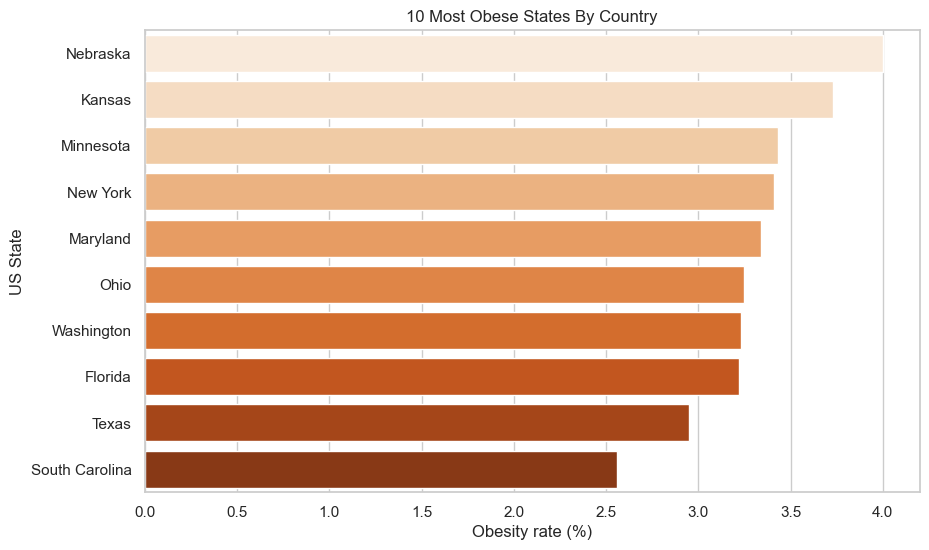

In [565]:
plt.figure(figsize=(10, 6))
sns.barplot(x='%_national_obesity', y='LocationDesc', hue='LocationDesc', data=df_Q036[['LocationDesc', '%_national_obesity']].sort_values(by='%_national_obesity', ascending=False)[1:11], palette='Oranges', legend=False)

plt.title('10 Most Obese States By Country')
plt.xlabel('Obesity rate (%)')
plt.ylabel('US State')

plt.show()

<h5>Выводы:</h5>
<p>Небраска имеет самый высокий уровень ожирения среди представленных штатов, около 3.8%.
<p>Южная Каролина имеет самый низкий уровень ожирения среди этих 10 штатов, около 2.5%.
<p>Другие штаты, такие как Канзас, Миннесота, Нью-Йорк, Мэриленд, Огайо, Вашингтон, Флорида и Техас, имеют уровни ожирения между 3% и 3.5%
<hr>

<h4>Топ 10 штатов с самым высоким показателем ожирения по штатам</h4>

<Figure size 1000x600 with 0 Axes>

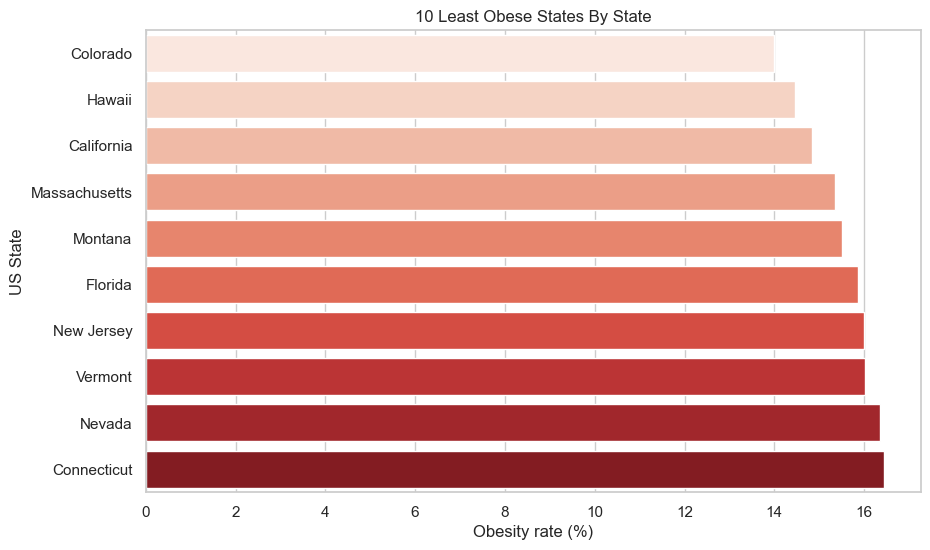

In [566]:
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.barplot(x='%_state_obesity', y='LocationDesc', hue='LocationDesc', data=df_Q036[['LocationDesc', '%_state_obesity']].sort_values(by='%_state_obesity', ascending=True)[:10], palette='Reds', legend=False)

plt.title('10 Least Obese States By State')
plt.xlabel('Obesity rate (%)')
plt.ylabel('US State')

plt.show()

<h5>Выводы:</h5>
<p>Западная Виргиния имеет самый высокий уровень ожирения среди представленных штатов, около 22%.
<p>Айова имеет самый низкий уровень ожирения среди этих 10 штатов, около 19%.
<p>Другие штаты, такие как Миссисипи, Луизиана, Алабама, Кентукки, Арканзас, Оклахома, Виргинские острова и Теннесси, имеют уровни ожирения между 20% и 21%.
<hr>

<h4>1.7 Топ 10 штатов с самым низким показателем ожирения по стране</h4>

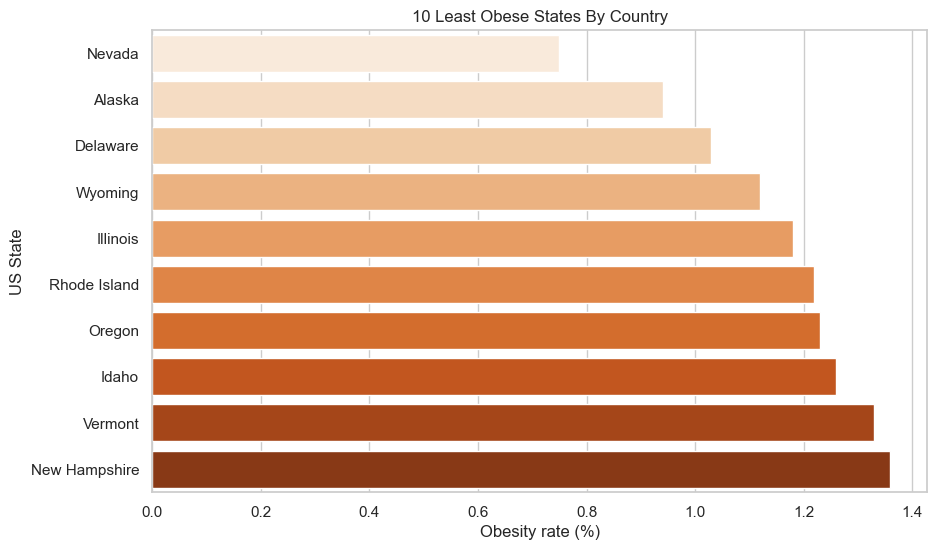

In [567]:
plt.figure(figsize=(10, 6))
sns.barplot(x='%_national_obesity', y='LocationDesc', hue='LocationDesc', data=df_Q036[['LocationDesc', '%_national_obesity']].sort_values(by='%_national_obesity', ascending=True)[:10], palette='Oranges', legend=False)

plt.title('10 Least Obese States By Country')
plt.xlabel('Obesity rate (%)')
plt.ylabel('US State')

plt.show()

<h5>Выводы:</h5>
<p>Виргинские острова имеют самый низкий уровень ожирения среди представленных штатов, около 0.2%.
<p>Род-Айленд имеет самый высокий уровень ожирения среди этих 10 штатов, около 1.2%.
<p>Другие штаты, такие как Гуам, округ Колумбия, Невада, Аляска, Делавэр, Пуэрто-Рико, Вайоминг и Иллинойс, имеют уровни ожирения между 0.4% и 1.1%.
<hr>

<h4>Топ 10 штатов с самым низким показателем ожирения по штатам</h4>

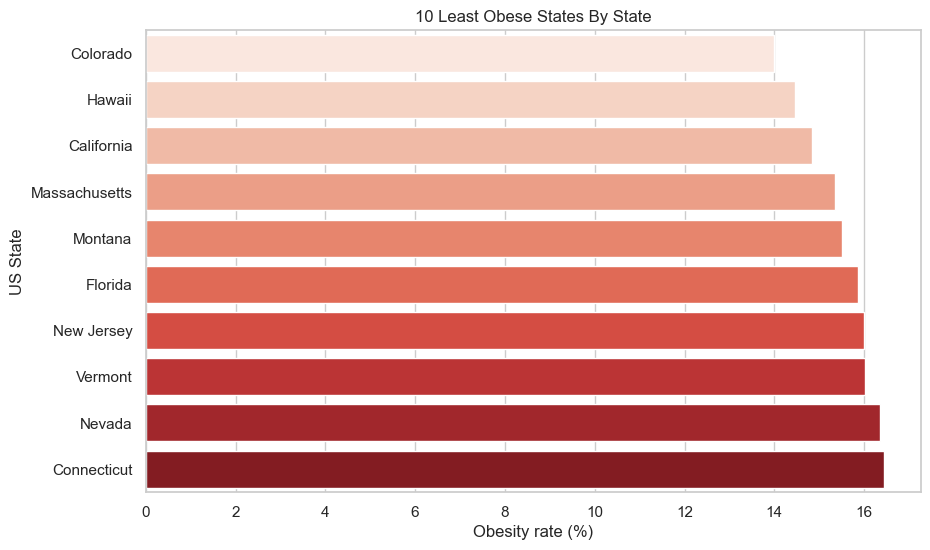

In [568]:
plt.figure(figsize=(10, 6))
sns.barplot(x='%_state_obesity', y='LocationDesc', hue='LocationDesc', data=df_Q036[['LocationDesc', '%_state_obesity']].sort_values(by='%_state_obesity', ascending=True)[:10], palette='Reds', legend=False)

plt.title('10 Least Obese States By State')
plt.xlabel('Obesity rate (%)')
plt.ylabel('US State')

plt.show()

<h5>Выводы:</h5>
<p>Невада имеет самый низкий уровень ожирения среди представленных штатов, около 16%.
<p>Колорадо имеет самый высокий уровень ожирения среди этих 10 штатов, около 14%.
<p>Другие штаты, такие как Гавайи, Калифорния, округ Колумбия, Массачусетс, Монтана, Флорида, Нью-Джерси и Вермонт, имеют уровни ожирения между 14% и 15%.
<hr>

<h3>На основе представленных графиков можно выделить следующие факторы риска, которые являются показателями к появлению ожирения:</h3>

<h4>1. Низкий уровень образования:</h4>

Люди с минимальным уровнем образования имеют наибольший процент ожирения (30.45%), тогда как у людей с высшим образованием этот процент наименьший (23.57%).
<h4>2. Низкий уровень дохода:</h4>

Наибольший уровень ожирения наблюдается среди людей с доходом менее $15,000 (35.72%) и в диапазоне $15,000 - $24,999 (34.53%).
<h4>3. Возраст:</h4>

Уровень ожирения увеличивается с возрастом, достигая пика в возрастных группах 45-54 лет (36%) и 55-64 лет (35.22%).
<h4>4. Раса/этническая принадлежность:</h4>

Наибольший уровень ожирения наблюдается среди неиспаноязычных чернокожих (39.75%) и коренных американцев/аляскинских коренных жителей (37.16%).
<h4>5. Географическое положение:</h4>

<p>Среди штатов с наибольшим уровнем ожирения: Западная Виргиния, Миссисипи, Луизиана, Алабама, Кентукки.
<p>Среди стран с наибольшим уровнем ожирения: Теннесси, Канзас, Миннесота, Нью-Йорк, Мэриленд.
<hr>

<h2>Физические нагрузки</h2>
1. Занимаются аэробикой хотя бы 150 мин в неделю и 2 или более раз занимаются силовыми тренировками (2,0)<p>
2. Занимаются аэробикой хотя бы 150 мин в неделю (0,5)<p>
3. Занимаются аэробикой хотя бы 300 мин в неделю (1,0)<p>
4. Занимаются занимаются силовыми тренировками 2 или более раз в неделю (1,5)<p>
5. Не занимаются спортом (0)
</p>

In [569]:
fiz = df1.query("QuestionID not in ['Q036', 'Q037', 'Q018', 'Q019']")

In [570]:
fiz1 = fiz[(fiz['StratificationCategory1'] == 'Gender')][['QuestionID', 'Question', 'Data_Value', 'Stratification1', 'count', 'Loc_Num']]

<h5>Чисто для заметки рассмотреть какие выбросы по показателю 'выборка' основываясь на половой признак</h5>

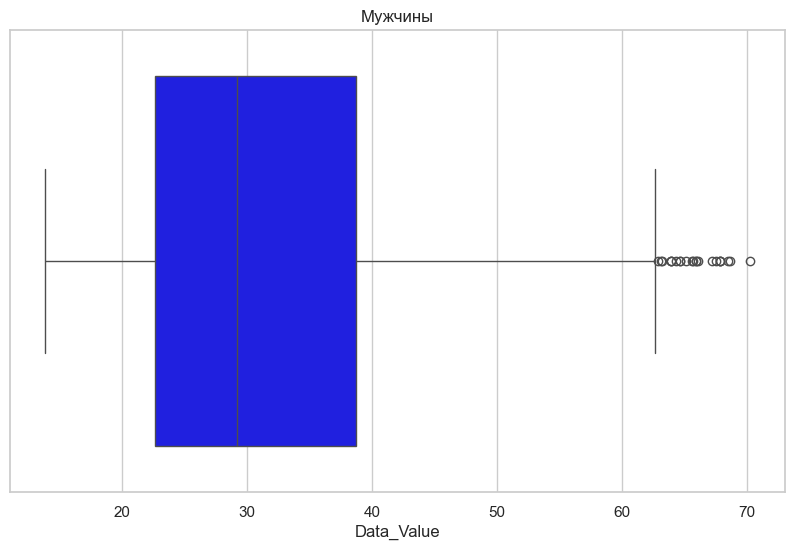

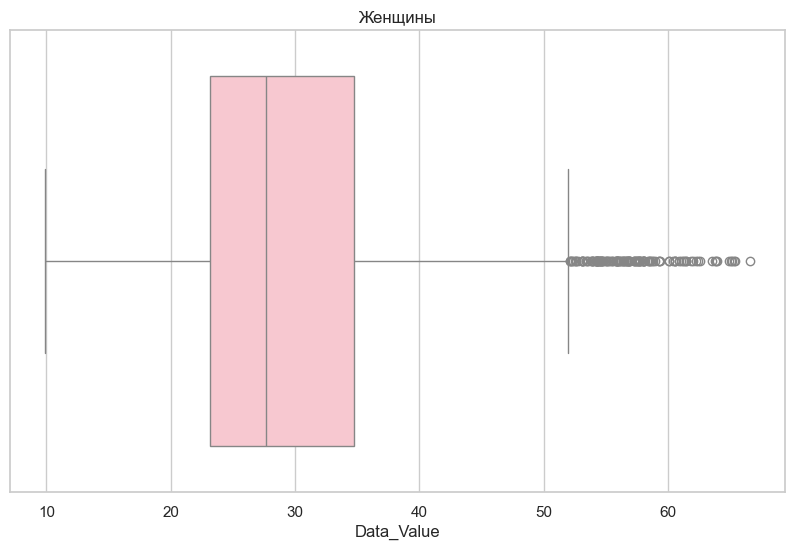

In [571]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=fiz1[fiz1['Stratification1']=='Male']['Data_Value'], color='blue')
plt.title('Мужчины')
plt.figure(figsize=(10, 6))
sns.boxplot(x=fiz1[fiz1['Stratification1']=='Female']['Data_Value'], color='pink')
plt.title('Женщины')
plt.show()

In [572]:
#Выкидываем выбросы в мусорку, котоыре отклоняются более чем на 3 стандартных отклонения
mean = fiz1['Data_Value'].mean()
std = fiz1['Data_Value'].std()
fiz1 = fiz1[(fiz1['Data_Value'] >= mean - 3 * std) & (fiz1['Data_Value'] <= mean + 3 * std)]

In [573]:
fiz1

,QuestionID,Question,Data_Value,Stratification1,count,Loc_Num
2,Q044,Percent of adults who achieve at least 150 min...,21.7,Female,369.0,1
36,Q047,Percent of adults who engage in no leisure-tim...,24.0,Female,433.0,1
39,Q044,Percent of adults who achieve at least 150 min...,28.1,Male,411.0,1
49,Q047,Percent of adults who engage in no leisure-tim...,20.1,Male,310.0,1
57,Q045,Percent of adults who achieve at least 300 min...,37.5,Female,644.0,1
...,...,...,...,...,...,...
104174,Q046,Percent of adults who engage in muscle-strengt...,38.9,Female,888.0,50
104187,Q044,Percent of adults who achieve at least 150 min...,27.7,Female,545.0,50
104196,Q045,Percent of adults who achieve at least 300 min...,49.1,Male,847.0,50
104209,Q047,Percent of adults who engage in no leisure-tim...,27.6,Female,654.0,50


<h4>Рассмотрим как факторы такие как пол, образование, раса и этнос, доход, возраст и все в общем влияют на занятие спортом</h4>

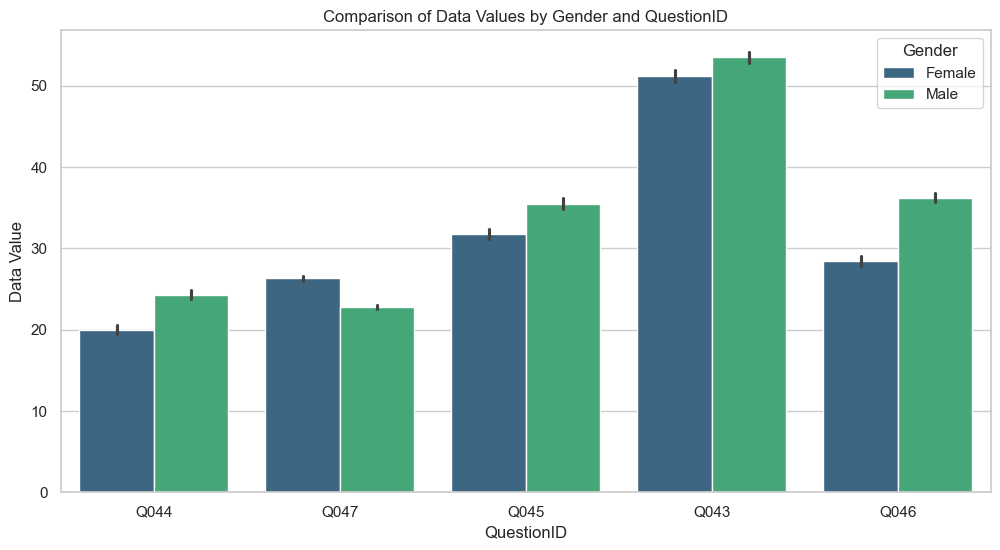

In [574]:
plt.figure(figsize=(12, 6))
sns.barplot(x='QuestionID', y='Data_Value', hue='Stratification1', data=fiz1, palette='viridis')
plt.title('Comparison of Data Values by Gender and QuestionID')
plt.xlabel('QuestionID')
plt.ylabel('Data Value')
plt.legend(title='Gender')
plt.show()

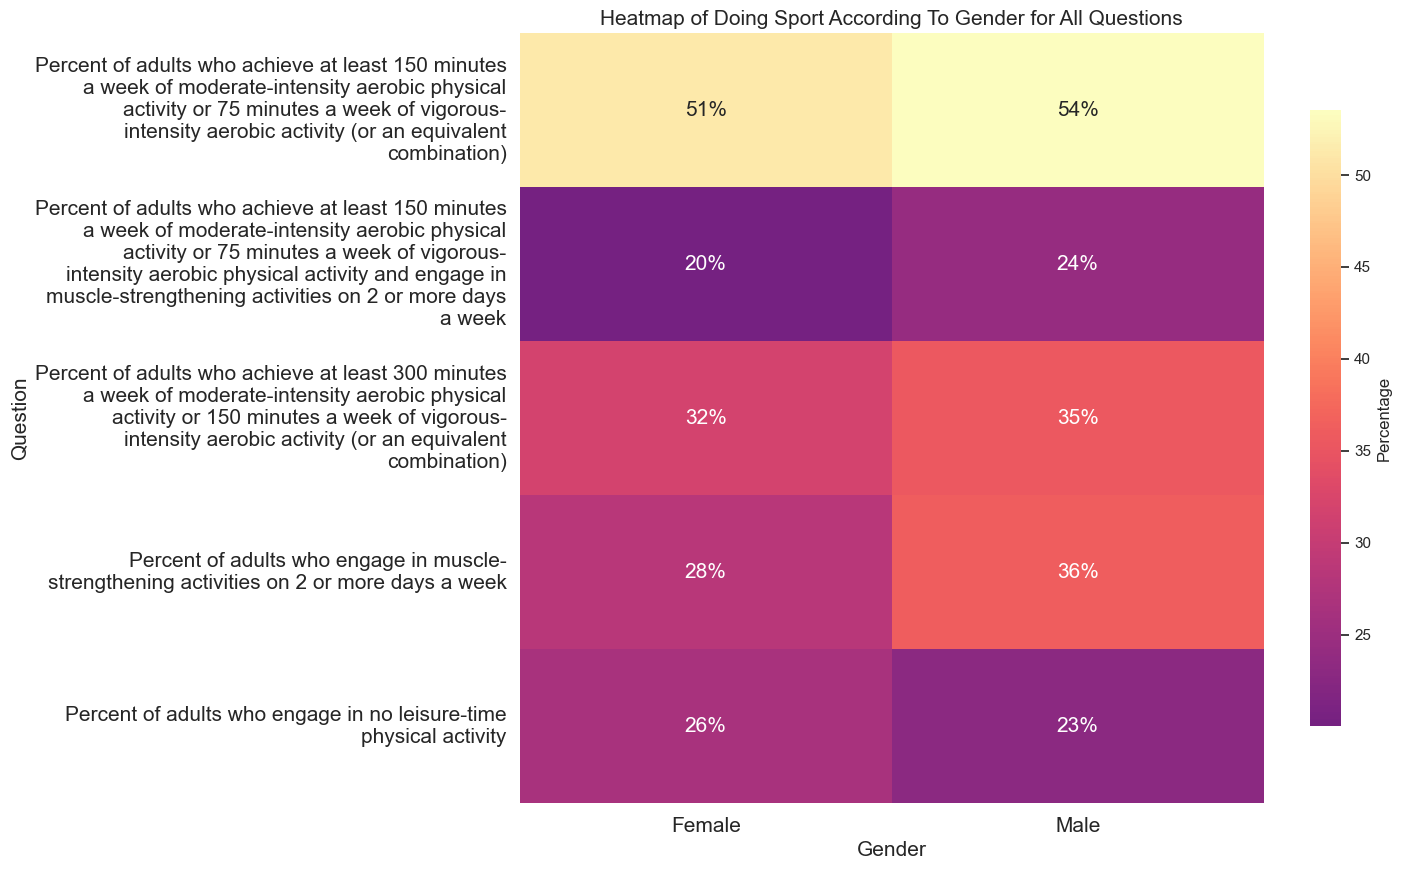

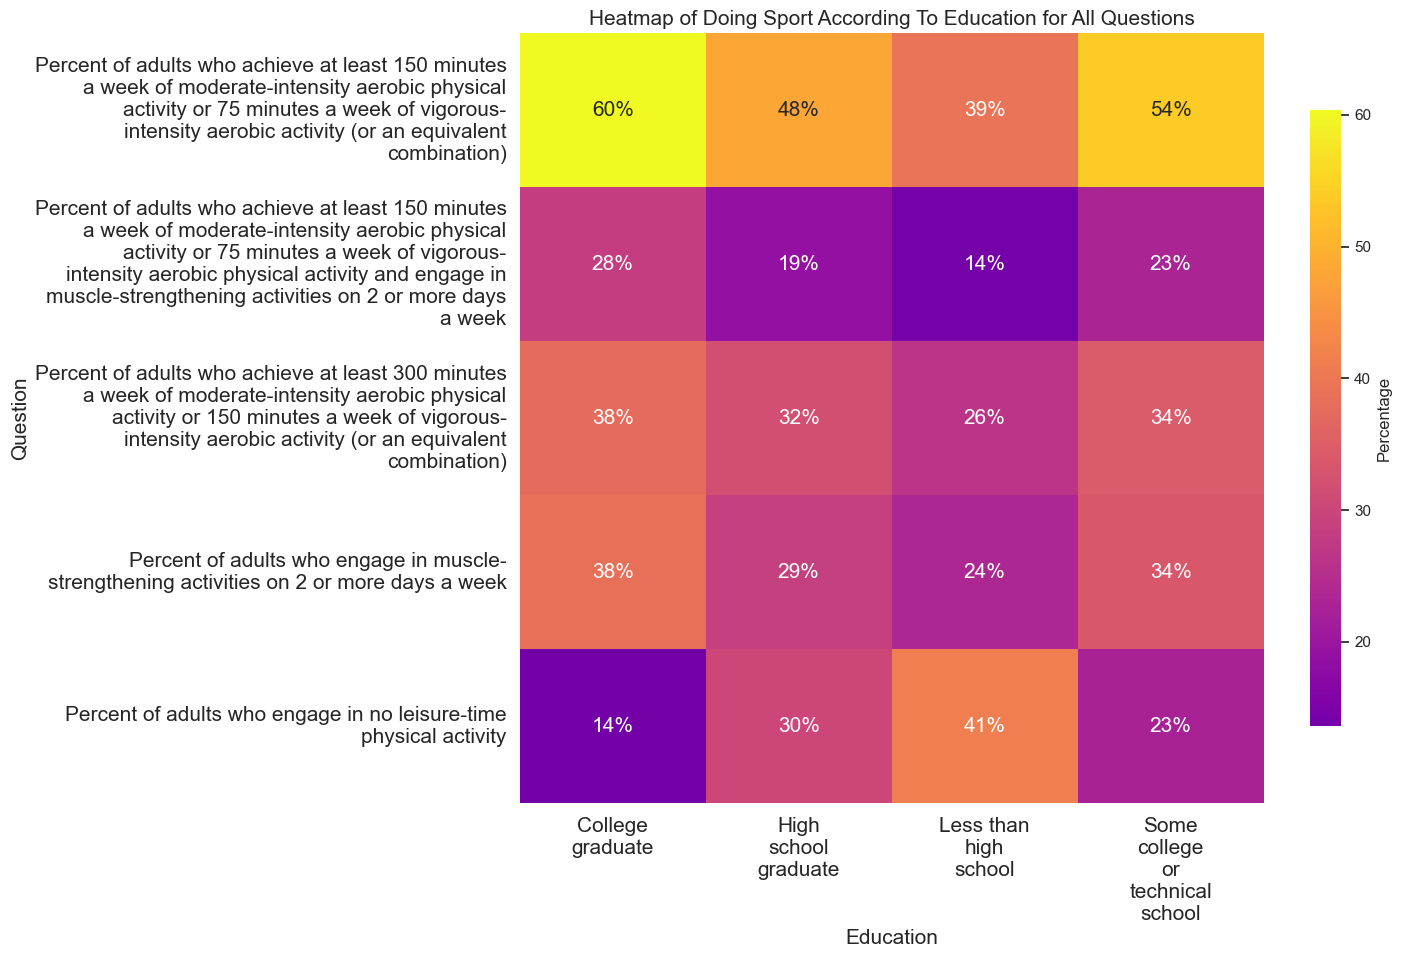

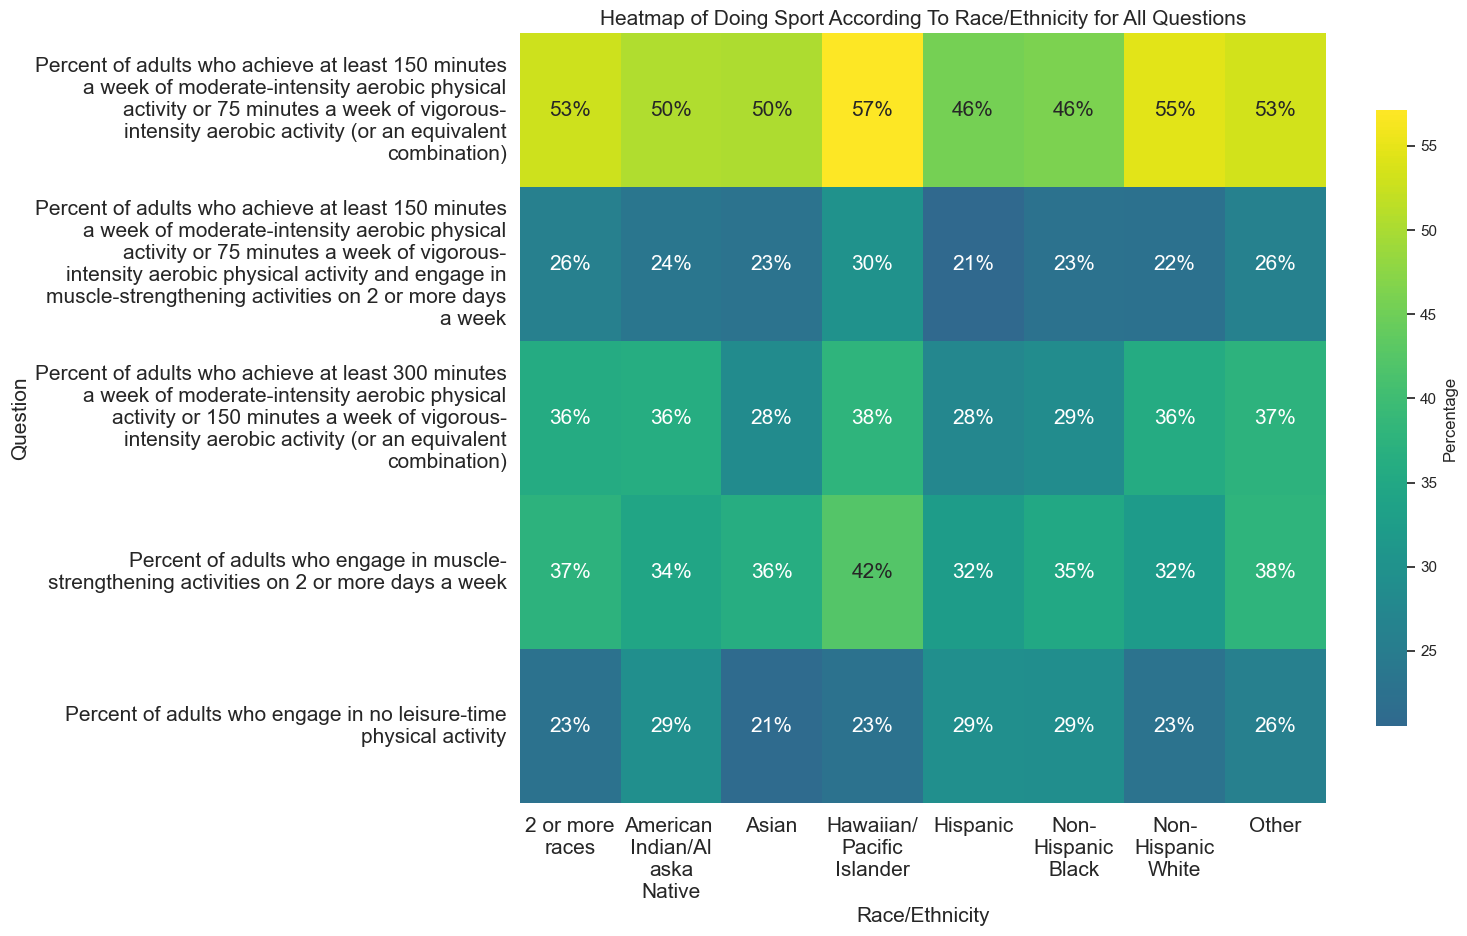

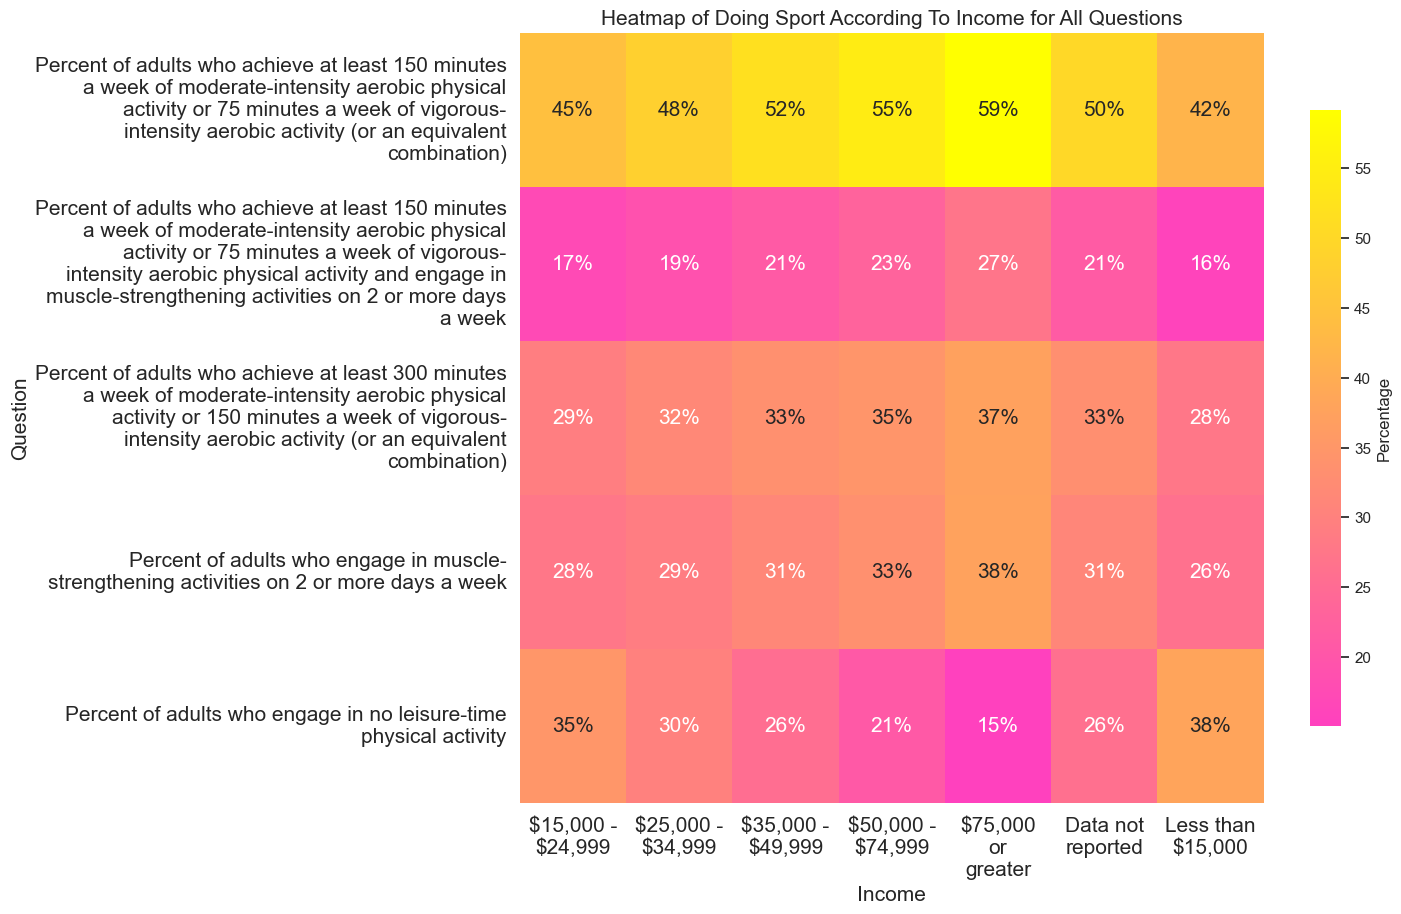

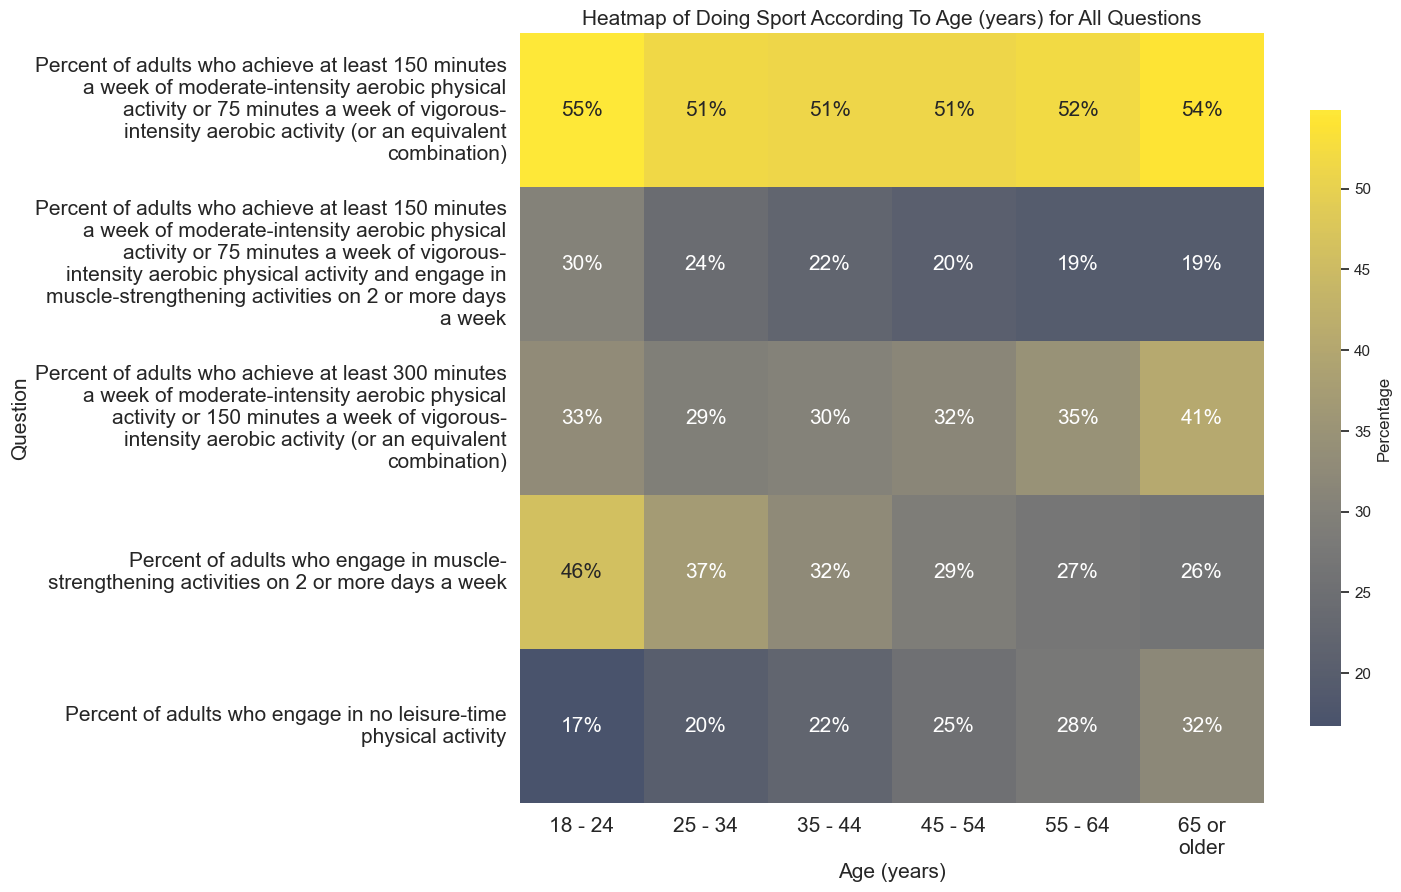

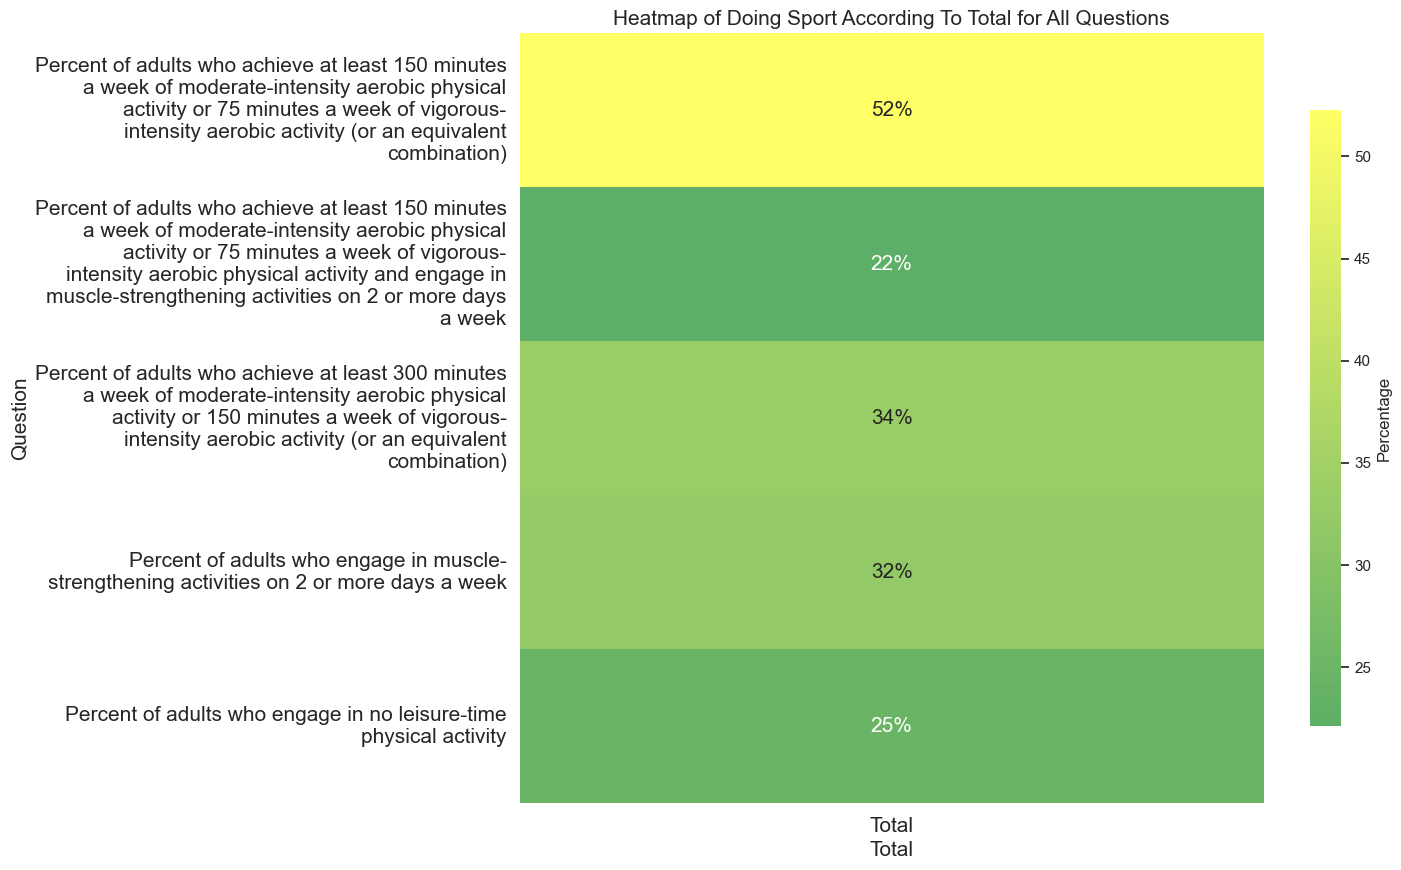

In [575]:
def annot_format(value):
    return f"{value}%"

def wrap_text(text, width=50):
    return "\n".join(textwrap.wrap(text, width=width))

def wrap_text_2(text, width=9):
    return "\n".join(textwrap.wrap(text, width=width))

styles = ['magma', 'plasma', 'viridis', 'spring', 'cividis', 'summer']

for style, filter in enumerate(fiz['StratificationCategory1'].unique()):
    fiz1 = fiz[(fiz['StratificationCategory1'] == filter)][['QuestionID', 'Question', 'Data_Value', 'Stratification1', 'count', 'Loc_Num']]
    #Выкидываем выбросы в мусорку, котоыре отклоняются более чем на 3 стандартных отклонения
    mean = fiz1['Data_Value'].mean()
    std = fiz1['Data_Value'].std()
    fiz1 = fiz1[(fiz1['Data_Value'] >= mean - 3 * std) & (fiz1['Data_Value'] <= mean + 3 * std)]

    if style == 2:
        plt.figure(figsize=(13, 10))
    else:
        plt.figure(figsize=(12, 10))
    pivot_table = fiz1.sort_values('Data_Value').pivot_table(index='Question', columns='Stratification1', values='Data_Value', aggfunc='mean')
    pivot_table.index = [wrap_text(label) for label in pivot_table.index]
    pivot_table.columns = [wrap_text_2(label) for label in pivot_table.columns]
    
    sns.set(style="whitegrid")

    ax = sns.heatmap(pivot_table, annot=True, cmap=styles[style], center=st.median(fiz1['Data_Value']), cbar=True,
                    annot_kws={"fontsize": 15},
                    cbar_kws={'label': 'Percentage', 'shrink': 0.8})

    for text in ax.texts:
        text.set_text(annot_format(int(float(text.get_text()))))

    plt.title(f'Heatmap of Doing Sport According To {filter} for All Questions', fontsize=15)
    plt.xlabel(filter, fontsize=15)
    plt.ylabel('Question', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.show()

<h4>Вывод</h4>
<p>Таким образом, можно заключить, что мужчины, представители двух или более рас, молодые люди, выпускники колледжей и люди с более высоким доходом в целом более активны. В то же время женщины, не испаноязычные чернокожие, азиаты, пожилые люди, люди с низким уровнем образования и дохода менее активны.

In [655]:
food = df1.query("QuestionID in ['Q018', 'Q019'] and Stratification1 != 'Data not reported'")
pivot_table = food[food['StratificationCategory1']=='Gender'].groupby(['Question','Stratification1'])['Data_Value'].mean().reset_index()
pivot_table.reset_index()

,index,Question,Stratification1,Data_Value
0,0,Percent of adults who report consuming fruit l...,Female,35.978808
1,1,Percent of adults who report consuming fruit l...,Male,42.388742
2,2,Percent of adults who report consuming vegetab...,Female,17.002649
3,3,Percent of adults who report consuming vegetab...,Male,21.875497


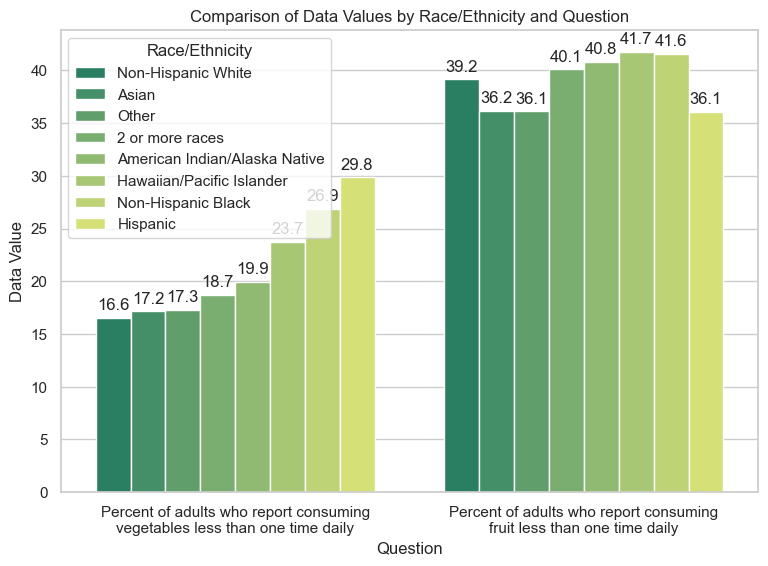

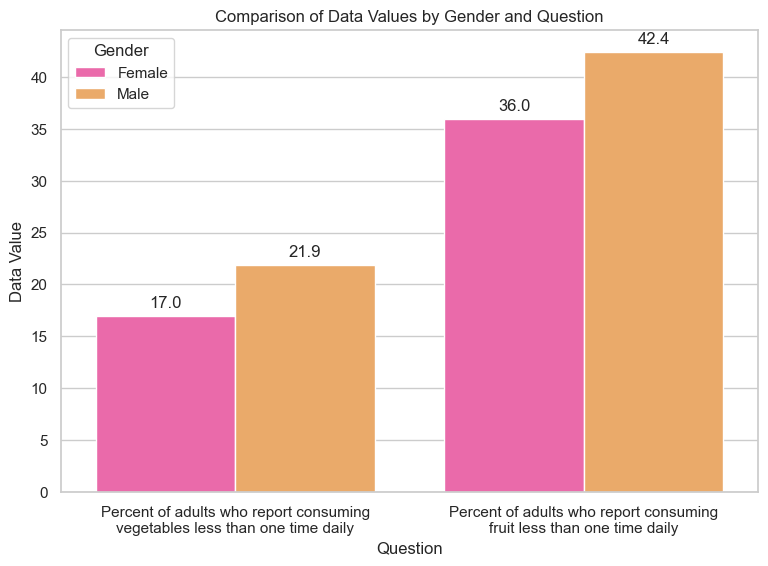

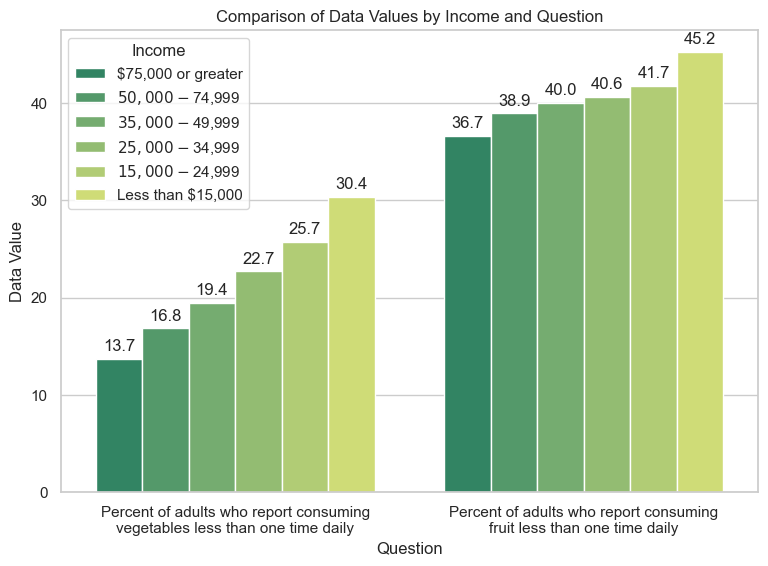

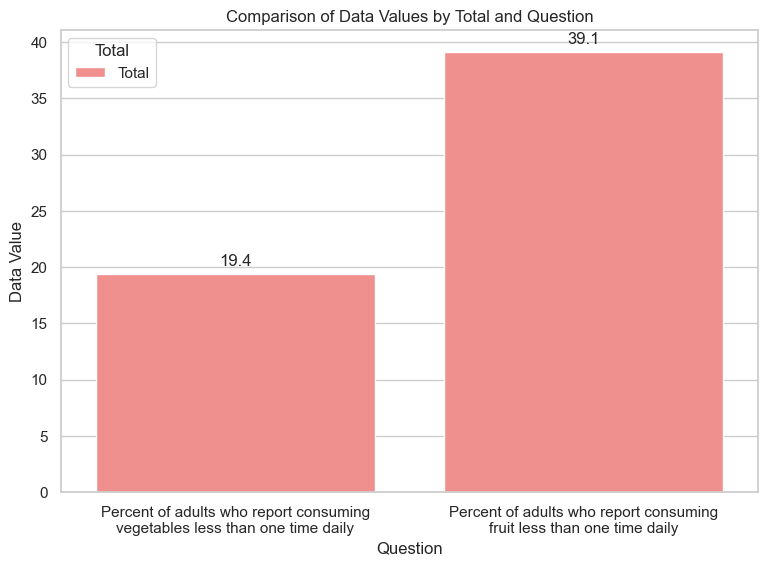

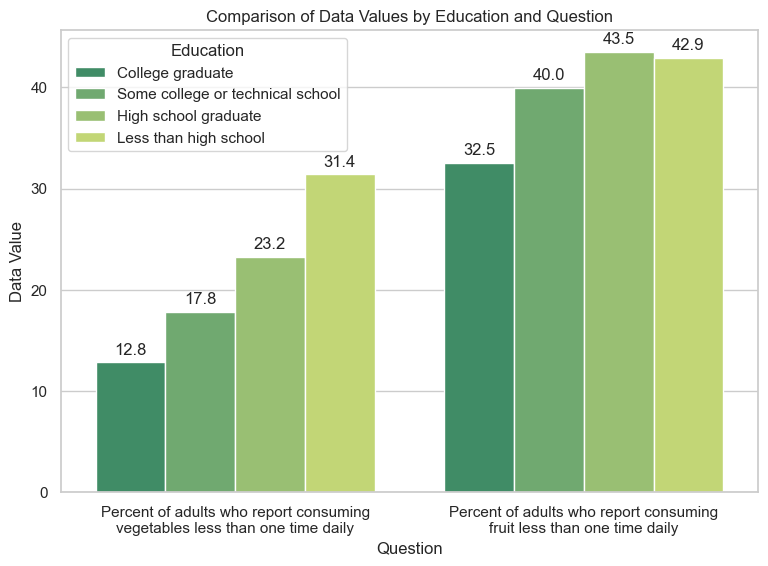

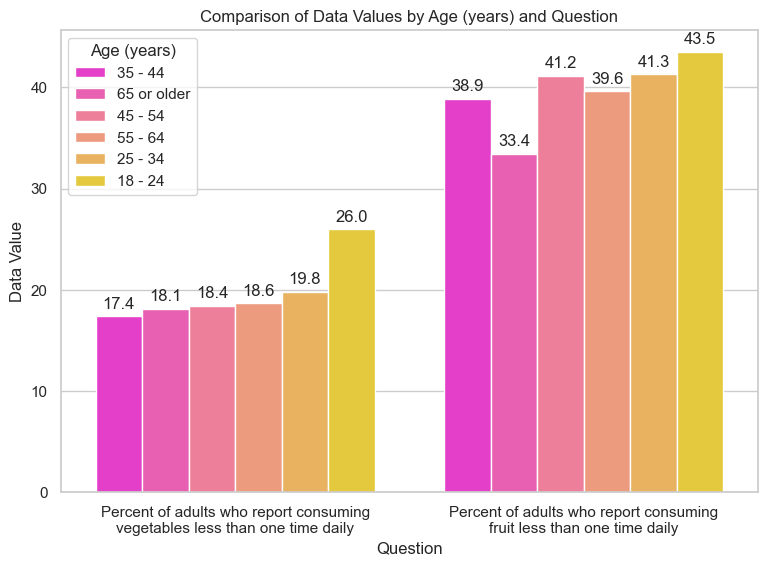

In [689]:
def wrap_text(text, width=40):
    return "\n".join(textwrap.wrap(text, width=width))

for style, filter in enumerate(food['StratificationCategory1'].unique()):
    f1 = food[food['StratificationCategory1'] == filter]
    mean = f1['Data_Value'].mean()
    std = f1['Data_Value'].std()
    f1 = f1[(f1['Data_Value'] >= mean - 3 * std) & (f1['Data_Value'] <= mean + 3 * std)]

    pivot_table = food[food['StratificationCategory1']==filter].groupby(['Question','Stratification1'])['Data_Value'].mean().reset_index()
    pivot_table.Question = [wrap_text(label) for label in pivot_table.Question]

    plt.figure(figsize=(9, 6))

    if style%2==0:
        ax = sns.barplot(x='Question', y='Data_Value', hue='Stratification1', data=pivot_table.sort_values('Data_Value'), palette='summer')
    else:
        ax = sns.barplot(x='Question', y='Data_Value', hue='Stratification1', data=pivot_table.sort_values('Data_Value'), palette='spring')

    for p in ax.patches:
        if p.get_height() < 1:
            ...
        else: 
            ax.annotate(format(p.get_height(), '.1f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha = 'center', va = 'center',
                            xytext = (0, 9),
                            textcoords = 'offset points')

    plt.title(f'Comparison of Data Values by {filter} and Question')
    plt.xlabel('Question')
    plt.ylabel('Data Value')
    plt.legend(title=filter)
    plt.show()